In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df1 = pd.read_csv('datasets/weather.csv')
df2 = pd.read_excel('datasets/unemployment.xlsx',skiprows=10)
df1.index = pd.to_datetime(df1['DATE'])
df1 = df1['TAVG']
df1 = df1[df1.index>'2011']
mtavg = df1.groupby(by=df1.index.month).mean()
munem = df2.mean(axis=0)[1:]
df3 = pd.DataFrame(mtavg)
df3['UNEM']=munem.values

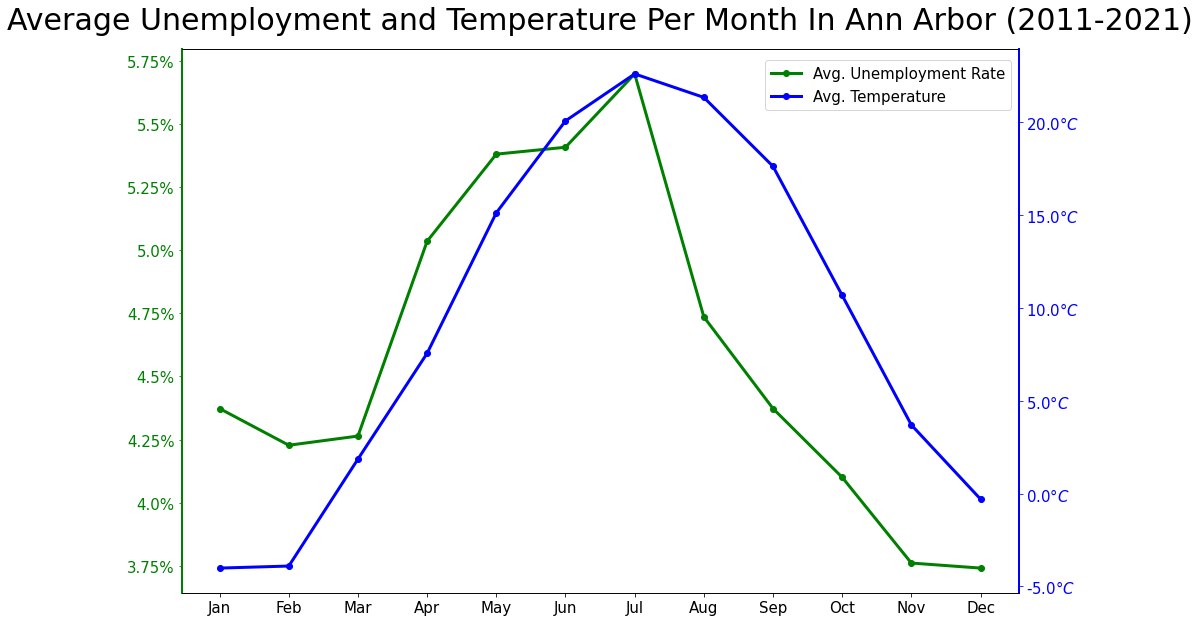

In [214]:
fig, ax1 = plt.subplots(figsize=(15,10))

ax2 = ax1.twinx()
ax1.plot(df3['UNEM'], 'g-',marker='o',label='Avg. Unemployment Rate',linewidth=3)
ax2.plot(df3['TAVG'], 'b-',marker='o',label='Avg. Temperature',linewidth=3)

#ax1.set_ylabel('Unemployment Rate',size=15,labelpad=20)
#ax2.set_ylabel('Temperature',size=15,labelpad=20)
plt.xticks(np.arange(1, 13, 1))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='y',colors='green')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='y',colors='blue')

ax2.spines['right'].set_color('blue')
ax2.spines['right'].set_linewidth(2)

ax2.spines['left'].set_color('green')
ax2.spines['left'].set_linewidth(2)

def format_func(value, tick_number):
    return str(value)+r"%"
def format_func2(value,tick_number):
    return str(value)+r"$\degree C$"
def format_func3(value,tick_number):
    return munem.index[tick_number]

ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func2))
ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_func3))


fig.legend(bbox_to_anchor=(0.9,0.875),prop={'size': 15})
plt.title('Average Unemployment and Temperature Per Month In Ann Arbor (2011-2021)',size=30,pad=20);
plt.savefig('plot.png',bbox_inches='tight')